In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('ggplot')

In [2]:
oil_prices = pd.read_csv('input/oil.csv')

oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


In [4]:
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

In [6]:
oil_prices['Year'] = pd.to_datetime(oil_prices['Year'], errors='coerce')

oil_prices.rename(columns = {oil_prices.columns[1]: 'Oil_prices_1997_Dollars'}, inplace=True)

oil_prices.head()

,Year,Oil_prices_1997_Dollars
0,1870-01-01,58.53
1,1871-01-01,49.09
2,1872-01-01,24.68
3,1873-01-01,16.71
4,1874-01-01,19.86


<Axes: xlabel='Year'>

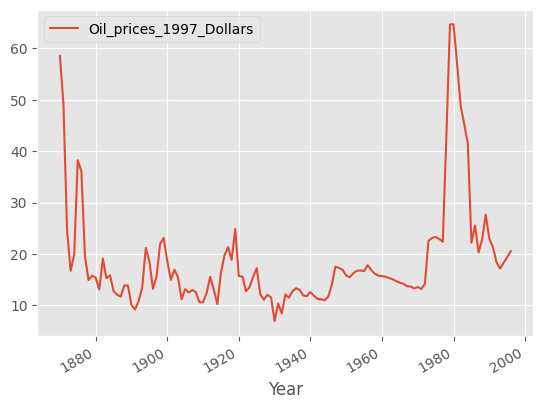

In [7]:
oil_prices.plot(x='Year', y='Oil_prices_1997_Dollars')

Text(0.5, 1.0, 'Oil Prices Lag Plot')

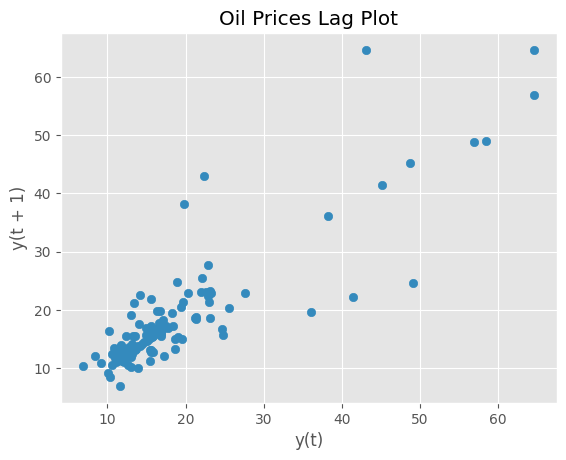

In [14]:
pd.plotting.lag_plot(oil_prices['Oil_prices_1997_Dollars']).set_title('Oil Prices Lag Plot')

Text(0.5, 1.0, 'Oil Price Autocorrelation')

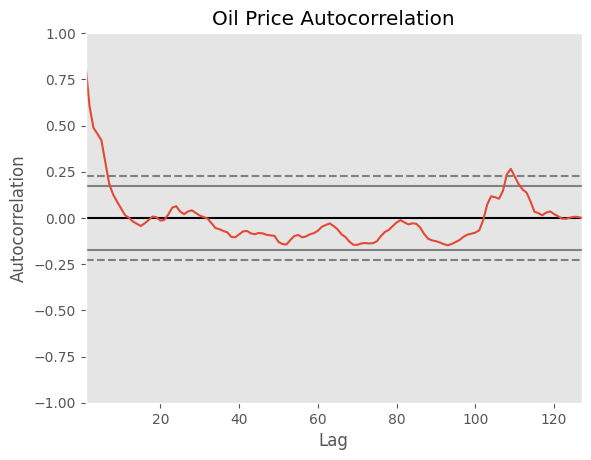

In [29]:
pd.plotting.autocorrelation_plot(oil_prices['Oil_prices_1997_Dollars'].dropna()).set_title('Oil Price Autocorrelation')

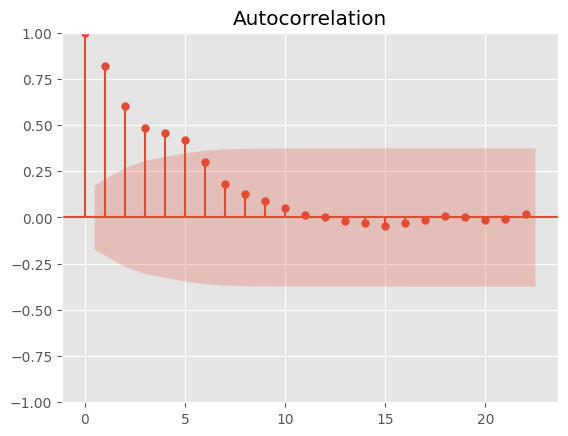

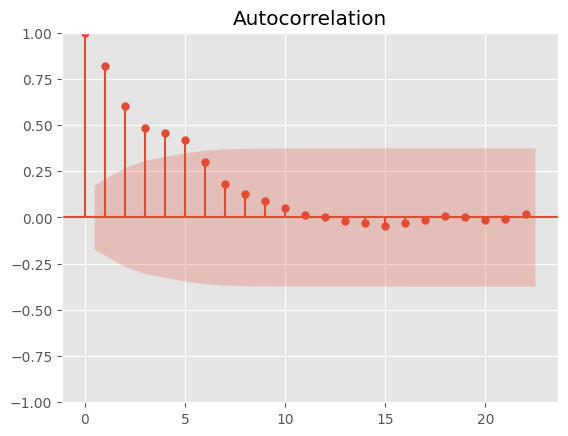

In [31]:
plot_acf(oil_prices['Oil_prices_1997_Dollars'].dropna())

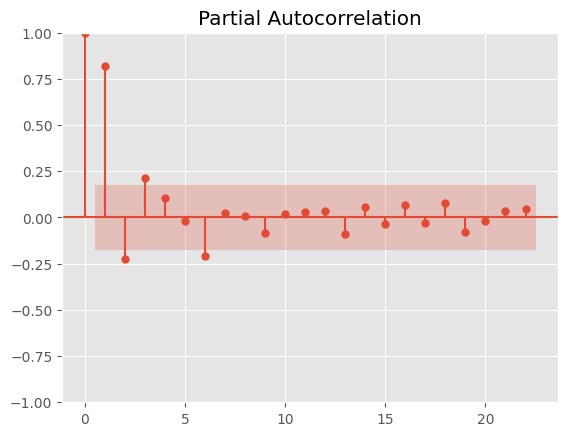

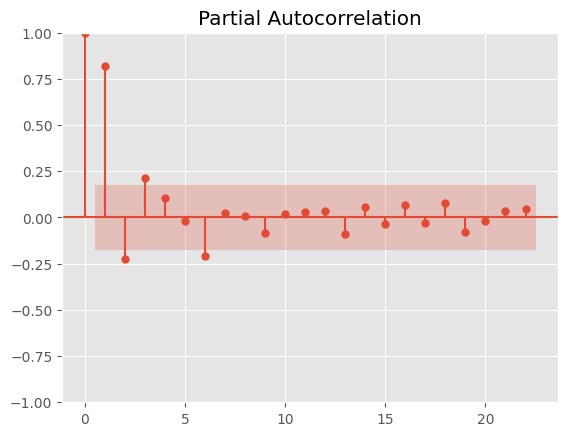

In [32]:
plot_pacf(oil_prices['Oil_prices_1997_Dollars'].dropna())

In [35]:
car_crashes = pd.read_csv('input/car_crashes.csv')
car_crashes['Year'] = car_crashes['Year'].astype(str)
car_crashes['Year'] = pd.to_datetime(car_crashes['Year'], errors='coerce')
car_crashes['Car_Crash_Fatalities_US'] = car_crashes['Car_Crash_Fatalities_US']/1000
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,0.036
1,1901-01-01,0.054
2,1902-01-01,0.079
3,1903-01-01,0.117
4,1904-01-01,0.172


In [36]:
prices_crashes = pd.merge(oil_prices, car_crashes, on='Year')
prices_crashes.head()

,Year,Oil_prices_1997_Dollars,Car_Crash_Fatalities_US
0,1900-01-01,18.64,0.036
1,1901-01-01,14.94,0.054
2,1902-01-01,16.90,0.079
3,1903-01-01,15.46,0.117
4,1904-01-01,11.15,0.172


<Axes: xlabel='Year'>

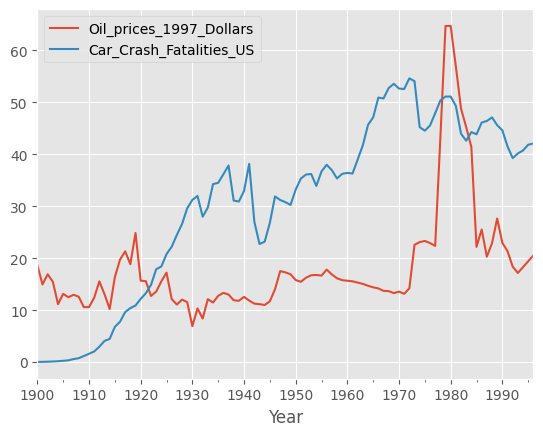

In [37]:
prices_crashes.plot(x='Year')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

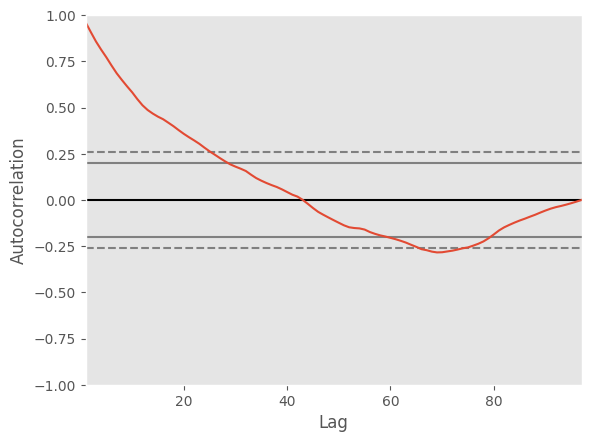

In [39]:
pd.plotting.autocorrelation_plot(prices_crashes[['Car_Crash_Fatalities_US', 'Oil_prices_1997_Dollars']])